# **Deasafio Estructura de datos**

## **Por:** *Jacobo Ropero Ramirez* & *Zuan Caleb Catata Echeverri*

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
#:)
df = pd.read_csv("8._RUTAS_TRANSPORTE_URBANO_20251011.csv", index_col="codigo")
print(df.columns)

df_filtrado = df.fillna({"empresa":"BUSETAS AUTONOMA"
                         ,"capacidad_minima" : df["capacidad_minima"].mean(),
                         'capacidad_maxima':df["capacidad_maxima"].mean(),
                        'frecuencia_de_despacho_hora_pico': "00",
                        'hora_primer_despacho': "05:00:00 a.m.",
                        'hora_ultimo_despacho': "08:30:00 p.m",})
df_filtrado = df_filtrado.dropna()

print(df_filtrado.describe())

print(df_filtrado)


#añadido de metadatos
if 'id' not in df.columns:
    df = df.copy()                         
    df['id'] = range(1, len(df) + 1)        
    print("se añadio la columna'id'")
else:
    print("'id' ya existe")

#creacion archivo excel; lo ultimito
df.to_excel("Excel_RUTAS_TRANSPORTE_URBANO.xlsx", index=False)
print("Guardado Excel_RUTAS_TRANSPORTE_URBANO.xlsx")

Index(['ruta', 'terminal', 'empresa', 'cartel_de_ruta_ida', 'recorrido',
       'capacidad_minima', 'capacidad_maxima',
       'frecuencia_de_despacho_hora_pico', 'hora_primer_despacho',
       'hora_ultimo_despacho', 'long_km', 'servicio', 'clase',
       'cartel_de_ruta_regreso', 'frecuencia_despacho_hora_valle'],
      dtype='object')
       capacidad_minima  capacidad_maxima  frecuencia_despacho_hora_valle
count         34.000000         34.000000                       34.000000
mean          16.852941         20.294118                       13.294118
std            5.320813          6.869032                        4.777025
min            4.000000          5.000000                        0.000000
25%           13.000000         16.000000                       12.000000
50%           19.000000         21.500000                       12.000000
75%           21.000000         26.000000                       15.000000
max           24.000000         30.000000                       30.0

In [117]:
cant_total = len(df_filtrado)
prom_gen_max = df_filtrado["capacidad_maxima"].mean()
prom_gen_min = df_filtrado["capacidad_minima"].mean()
prom_frec_pico = df_filtrado["frecuencia_de_despacho_hora_pico"].mean()
prom_frec_valle = df_filtrado["frecuencia_despacho_hora_valle"].mean()

df_filtrado["long_km"] = pd.to_numeric(df_filtrado["long_km"], errors="coerce") # convierte los numeros que estan guardados como string a numeros operables
prom_km = df_filtrado["long_km"].mean()

mindf = {
    "Cantidad de veiculos registrados" : cant_total,
    "Promedio Capacidad Maxima" : round(prom_gen_max,2),
    "Promedio Capacidad Minima" : round(prom_gen_min,2),
    "Promedio Frecuencia de despacho en hora pico" : round(prom_frec_pico,2),
    "Promedio Frecuencia de despacho en hora valle" : round(prom_frec_valle,2),
    "Promedio de Kilometros" : round(prom_km, 2)
}
minidata = pd.DataFrame([mindf])
minidata



,Cantidad de veiculos registrados,Promedio Capacidad Maxima,Promedio Capacidad Minima,Promedio Frecuencia de despacho en hora pico,Promedio Frecuencia de despacho en hora valle,Promedio de Kilometros
0,34,20.29,16.85,8.91,13.29,33.48


## Una vez filtrado los archivos realizamos las metas planteadas en el __*Desafio*__

## Datos Generales de tolas empresas en un mini DataFrame:

In [118]:
cant_total = len(df_filtrado)
prom_gen_max = df_filtrado["capacidad_maxima"].mean()
prom_gen_min = df_filtrado["capacidad_minima"].mean()
prom_frec_pico = df_filtrado["frecuencia_de_despacho_hora_pico"].mean()
prom_frec_valle = df_filtrado["frecuencia_despacho_hora_valle"].mean()

df_filtrado["long_km"] = pd.to_numeric(df_filtrado["long_km"], errors="coerce") # convierte los numeros que estan guardados como string a numeros operables
prom_km = df_filtrado["long_km"].mean()

mindf = {
    "Cantidad de veiculos registrados" : cant_total,
    "Promedio Capacidad Maxima" : round(prom_gen_max,2),
    "Promedio Capacidad Minima" : round(prom_gen_min,2),
    "Promedio Frecuencia de despacho en hora pico" : round(prom_frec_pico,2),
    "Promedio Frecuencia de despacho en hora valle" : round(prom_frec_valle,2),
    "Promedio de Kilometros" : round(prom_km, 2)
}
minidata = pd.DataFrame([mindf])
minidata



,Cantidad de veiculos registrados,Promedio Capacidad Maxima,Promedio Capacidad Minima,Promedio Frecuencia de despacho en hora pico,Promedio Frecuencia de despacho en hora valle,Promedio de Kilometros
0,34,20.29,16.85,8.91,13.29,33.48


## Empresa _*UNITRANSA S.A.*_

Empresa: OPERACIÓN AUTORIZADA A UNITRANSA S.A.
La cantidad de veiculos registrado de la empresa OPERACIÓN AUTORIZADA A UNITRANSA S.A. es: 12
El promedio de la "Capacidad Maxima" de la empresa OPERACIÓN AUTORIZADA A UNITRANSA S.A. es: 21.08
El promedio de la "Capacidad Minima" de la empresa OPERACIÓN AUTORIZADA A UNITRANSA S.A. es: 17.08
El promedio de la "Frecuencia de despacho en hora pico" de la empresa OPERACIÓN AUTORIZADA A UNITRANSA S.A. es: 9.17
El promedio de la "Frecuencia de despacho en hora valle" de la empresa OPERACIÓN AUTORIZADA A UNITRANSA S.A. es: 14.17


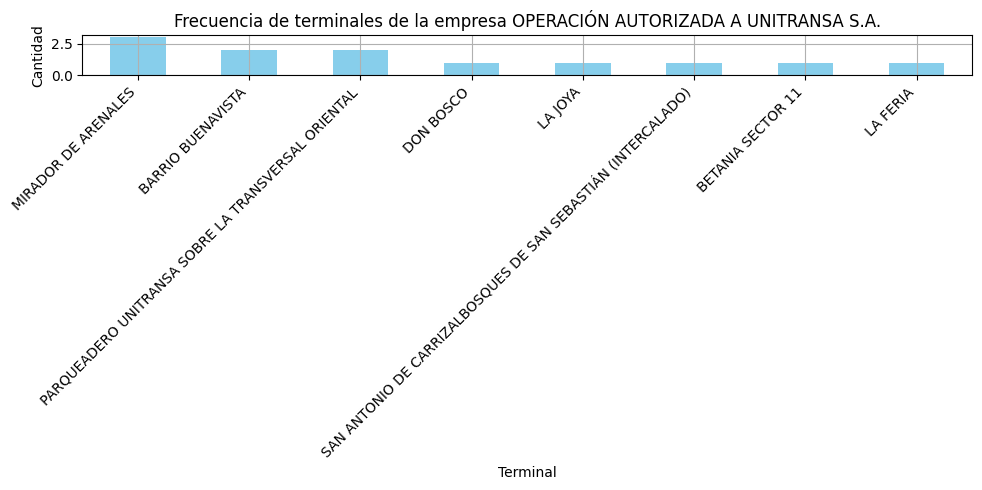

In [119]:
df_empr1 = df_filtrado[df_filtrado["empresa"] == "OPERACIÓN AUTORIZADA A UNITRANSA S.A."]

nombre_emp = df_empr1["empresa"].iloc[0]
print("Empresa:", nombre_emp)

cant = len(df_empr1)
cap_max = df_empr1["capacidad_maxima"].mean()
cap_min = df_empr1["capacidad_minima"].mean()
frec_pico = df_empr1["frecuencia_de_despacho_hora_pico"].mean()
frec_valle = df_empr1["frecuencia_despacho_hora_valle"].mean()

print(f"La cantidad de veiculos registrado de la empresa {nombre_emp} es: {cant}")
print(f"El promedio de la \"Capacidad Maxima\" de la empresa {nombre_emp} es: {round(cap_max, 2)}")
print(f"El promedio de la \"Capacidad Minima\" de la empresa {nombre_emp} es: {round(cap_min, 2)}")
print(f"El promedio de la \"Frecuencia de despacho en hora pico\" de la empresa {nombre_emp} es: {round(frec_pico, 2)}")
print(f"El promedio de la \"Frecuencia de despacho en hora valle\" de la empresa {nombre_emp} es: {round(frec_valle, 2)}")

conteo_term = df_empr1["terminal"].value_counts()

conteo_term.plot(kind="bar", figsize=(10,5), color="skyblue")

# Personalizar la gráfica
plt.title(f"Frecuencia de terminales de la empresa {nombre_emp}")
plt.xlabel("Terminal")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha="right")  # rotar nombres para que se lean mejor
plt.tight_layout()
plt.grid()
plt.show()

## Empresa _TRANSCOLOMBIA S.A._

Empresa: OPERACIÓN AUTORIZADA A TRANSCOLOMBIA S.A.
La cantidad de veiculos registrado de la empresa OPERACIÓN AUTORIZADA A TRANSCOLOMBIA S.A. es: 7
El promedio de la "Capacidad Maxima" de la empresa OPERACIÓN AUTORIZADA A TRANSCOLOMBIA S.A. es: 22.43
El promedio de la "Capacidad Minima" de la empresa OPERACIÓN AUTORIZADA A TRANSCOLOMBIA S.A. es: 17.86
El promedio de la "Frecuencia de despacho en hora pico" de la empresa OPERACIÓN AUTORIZADA A TRANSCOLOMBIA S.A. es: 7.86
El promedio de la "Frecuencia de despacho en hora valle" de la empresa OPERACIÓN AUTORIZADA A TRANSCOLOMBIA S.A. es: 12.43


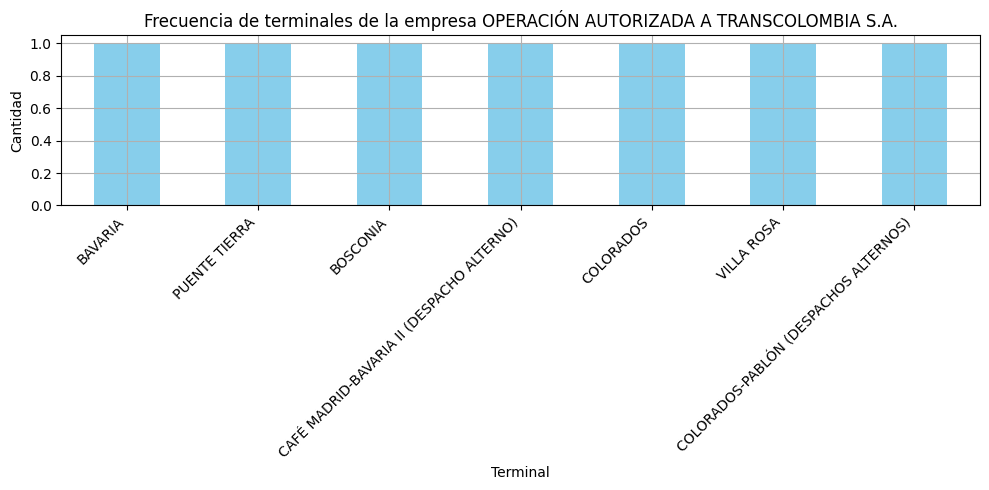

In [120]:
df_empr3 = df_filtrado[df_filtrado["empresa"] == "OPERACIÓN AUTORIZADA A TRANSCOLOMBIA S.A."]

nombre_emp = df_empr3["empresa"].iloc[0]
print("Empresa:", nombre_emp)

cant = len(df_empr3)
cap_max = df_empr3["capacidad_maxima"].mean()
cap_min = df_empr3["capacidad_minima"].mean()
frec_pico = df_empr3["frecuencia_de_despacho_hora_pico"].mean()
frec_valle = df_empr3["frecuencia_despacho_hora_valle"].mean()

print(f"La cantidad de veiculos registrado de la empresa {nombre_emp} es: {cant}")
print(f"El promedio de la \"Capacidad Maxima\" de la empresa {nombre_emp} es: {round(cap_max, 2)}")
print(f"El promedio de la \"Capacidad Minima\" de la empresa {nombre_emp} es: {round(cap_min, 2)}")
print(f"El promedio de la \"Frecuencia de despacho en hora pico\" de la empresa {nombre_emp} es: {round(frec_pico, 2)}")
print(f"El promedio de la \"Frecuencia de despacho en hora valle\" de la empresa {nombre_emp} es: {round(frec_valle, 2)}")

conteo_term = df_empr3["terminal"].value_counts()

conteo_term.plot(kind="bar", figsize=(10,5), color="skyblue")

plt.title(f"Frecuencia de terminales de la empresa {nombre_emp}")
plt.xlabel("Terminal")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid()
plt.show()

## Empresa _COTRANDER_

Empresa: COTRANDER
La cantidad de veiculos registrado de la empresa COTRANDER es: 5
El promedio de la "Capacidad Maxima" de la empresa COTRANDER es: 17.4
El promedio de la "Capacidad Minima" de la empresa COTRANDER es: 17.2
El promedio de la "Frecuencia de despacho en hora pico" de la empresa COTRANDER es: 9.4
El promedio de la "Frecuencia de despacho en hora valle" de la empresa COTRANDER es: 12.8


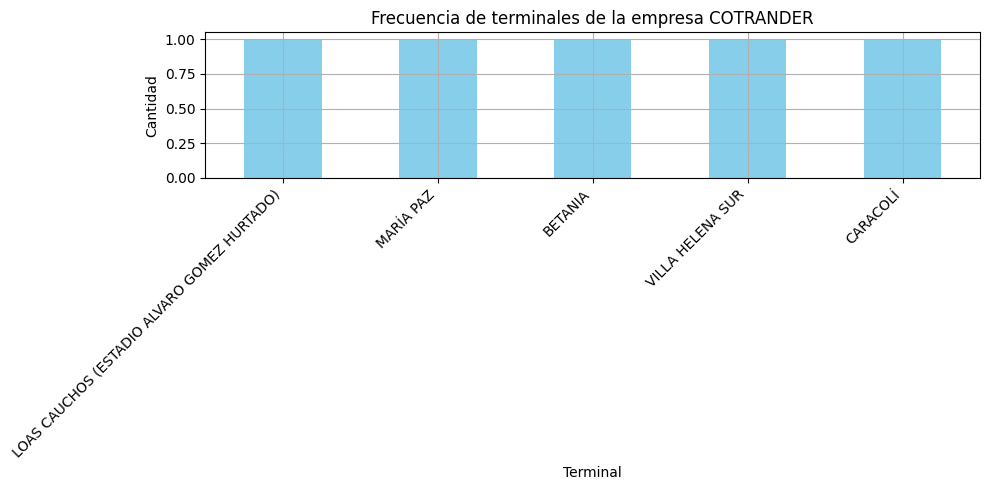

In [121]:
df_empr4 = df_filtrado[(df_filtrado["empresa"] == "OPERACIÓN AUTORIZADA A COTRANDER") | (df_filtrado["empresa"] == "COTRANDER")]

nombre_emp = df_empr4["empresa"].iloc[0]
print("Empresa:", nombre_emp)

cant = len(df_empr4)
cap_max = df_empr4["capacidad_maxima"].mean()
cap_min = df_empr4["capacidad_minima"].mean()
frec_pico = df_empr4["frecuencia_de_despacho_hora_pico"].mean()
frec_valle = df_empr4["frecuencia_despacho_hora_valle"].mean()

print(f"La cantidad de veiculos registrado de la empresa {nombre_emp} es: {cant}")
print(f"El promedio de la \"Capacidad Maxima\" de la empresa {nombre_emp} es: {round(cap_max, 2)}")
print(f"El promedio de la \"Capacidad Minima\" de la empresa {nombre_emp} es: {round(cap_min, 2)}")
print(f"El promedio de la \"Frecuencia de despacho en hora pico\" de la empresa {nombre_emp} es: {round(frec_pico, 2)}")
print(f"El promedio de la \"Frecuencia de despacho en hora valle\" de la empresa {nombre_emp} es: {round(frec_valle, 2)}")

conteo_term = df_empr4["terminal"].value_counts()

conteo_term.plot(kind="bar", figsize=(10,5), color="skyblue")

plt.title(f"Frecuencia de terminales de la empresa {nombre_emp}")
plt.xlabel("Terminal")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid()
plt.show()

## Empresa _LUSITANIA S.A._

Empresa: LUSITANIA S.A.
La cantidad de veiculos registrado de la empresa LUSITANIA S.A. es: 1
El promedio de la "Capacidad Maxima" de la empresa LUSITANIA S.A. es: 22.0
El promedio de la "Capacidad Minima" de la empresa LUSITANIA S.A. es: 20.0
El promedio de la "Frecuencia de despacho en hora pico" de la empresa LUSITANIA S.A. es: 4.0
El promedio de la "Frecuencia de despacho en hora valle" de la empresa LUSITANIA S.A. es: 4.0


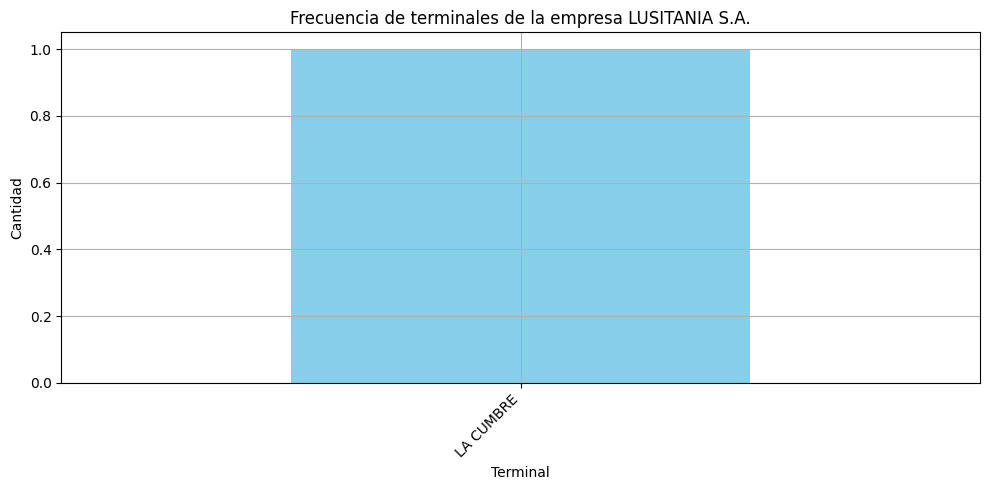

In [122]:
df_empr5 = df_filtrado[df_filtrado["empresa"] == "LUSITANIA S.A."]

nombre_emp = df_empr5["empresa"].iloc[0]
print("Empresa:", nombre_emp)

cant = len(df_empr5)
cap_max = df_empr5["capacidad_maxima"].mean()
cap_min = df_empr5["capacidad_minima"].mean()
frec_pico = df_empr5["frecuencia_de_despacho_hora_pico"].mean()
frec_valle = df_empr5["frecuencia_despacho_hora_valle"].mean()

print(f"La cantidad de veiculos registrado de la empresa {nombre_emp} es: {cant}")
print(f"El promedio de la \"Capacidad Maxima\" de la empresa {nombre_emp} es: {round(cap_max, 2)}")
print(f"El promedio de la \"Capacidad Minima\" de la empresa {nombre_emp} es: {round(cap_min, 2)}")
print(f"El promedio de la \"Frecuencia de despacho en hora pico\" de la empresa {nombre_emp} es: {round(frec_pico, 2)}")
print(f"El promedio de la \"Frecuencia de despacho en hora valle\" de la empresa {nombre_emp} es: {round(frec_valle, 2)}")

conteo_term = df_empr5["terminal"].value_counts()

conteo_term.plot(kind="bar", figsize=(10,5), color="skyblue")

plt.title(f"Frecuencia de terminales de la empresa {nombre_emp}")
plt.xlabel("Terminal")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid()
plt.show()

## Empresa _ORIENTAL DE TRANSPORTES S.A._

Empresa: ORIENTAL DE TRANSPORTES S.A.
La cantidad de veiculos registrado de la empresa ORIENTAL DE TRANSPORTES S.A. es: 1
El promedio de la "Capacidad Maxima" de la empresa ORIENTAL DE TRANSPORTES S.A. es: 21.0
El promedio de la "Capacidad Minima" de la empresa ORIENTAL DE TRANSPORTES S.A. es: 17.0
El promedio de la "Frecuencia de despacho en hora pico" de la empresa ORIENTAL DE TRANSPORTES S.A. es: 7.0
El promedio de la "Frecuencia de despacho en hora valle" de la empresa ORIENTAL DE TRANSPORTES S.A. es: 7.0


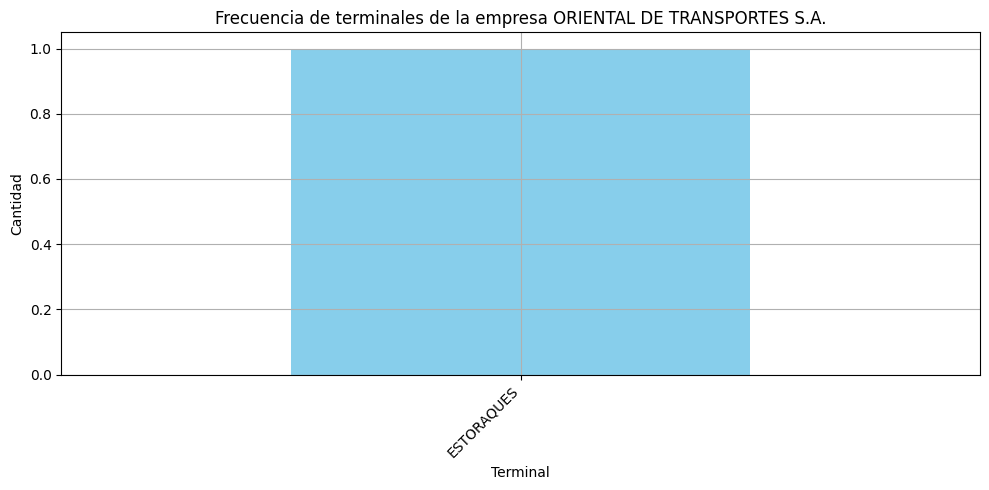

In [123]:
df_empr6 = df_filtrado[df_filtrado["empresa"] == "ORIENTAL DE TRANSPORTES S.A."]

nombre_emp = df_empr6["empresa"].iloc[0]
print("Empresa:", nombre_emp)

cant = len(df_empr6)
cap_max = df_empr6["capacidad_maxima"].mean()
cap_min = df_empr6["capacidad_minima"].mean()
frec_pico = df_empr6["frecuencia_de_despacho_hora_pico"].mean()
frec_valle = df_empr6["frecuencia_despacho_hora_valle"].mean()

print(f"La cantidad de veiculos registrado de la empresa {nombre_emp} es: {cant}")
print(f"El promedio de la \"Capacidad Maxima\" de la empresa {nombre_emp} es: {round(cap_max, 2)}")
print(f"El promedio de la \"Capacidad Minima\" de la empresa {nombre_emp} es: {round(cap_min, 2)}")
print(f"El promedio de la \"Frecuencia de despacho en hora pico\" de la empresa {nombre_emp} es: {round(frec_pico, 2)}")
print(f"El promedio de la \"Frecuencia de despacho en hora valle\" de la empresa {nombre_emp} es: {round(frec_valle, 2)}")

conteo_term = df_empr6["terminal"].value_counts()

conteo_term.plot(kind="bar", figsize=(10,5), color="skyblue")

plt.title(f"Frecuencia de terminales de la empresa {nombre_emp}")
plt.xlabel("Terminal")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid()
plt.show()

## Empresa _TRANSPORTES SAN JUAN S.A._

Empresa: TRANSPORTES SAN JUAN S.A.
La cantidad de veiculos registrado de la empresa TRANSPORTES SAN JUAN S.A. es: 2
El promedio de la "Capacidad Maxima" de la empresa TRANSPORTES SAN JUAN S.A. es: 30.0
El promedio de la "Capacidad Minima" de la empresa TRANSPORTES SAN JUAN S.A. es: 24.0
El promedio de la "Frecuencia de despacho en hora pico" de la empresa TRANSPORTES SAN JUAN S.A. es: 10.0
El promedio de la "Frecuencia de despacho en hora valle" de la empresa TRANSPORTES SAN JUAN S.A. es: 15.0


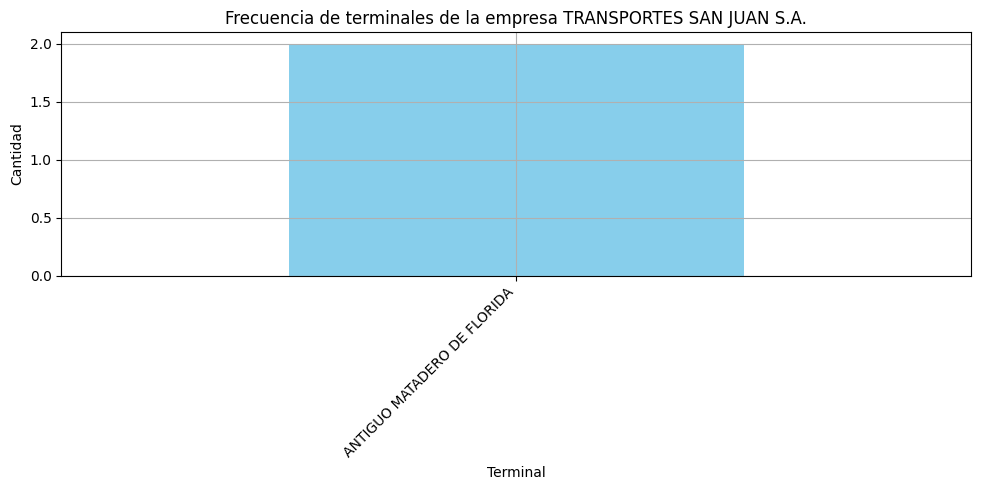

In [124]:
df_empr7 = df_filtrado[df_filtrado["empresa"] == "TRANSPORTES SAN JUAN S.A."]

nombre_emp = df_empr7["empresa"].iloc[0]
print("Empresa:", nombre_emp)

cant = len(df_empr7)
cap_max = df_empr7["capacidad_maxima"].mean()
cap_min = df_empr7["capacidad_minima"].mean()
frec_pico = df_empr7["frecuencia_de_despacho_hora_pico"].mean()
frec_valle = df_empr7["frecuencia_despacho_hora_valle"].mean()

print(f"La cantidad de veiculos registrado de la empresa {nombre_emp} es: {cant}")
print(f"El promedio de la \"Capacidad Maxima\" de la empresa {nombre_emp} es: {round(cap_max, 2)}")
print(f"El promedio de la \"Capacidad Minima\" de la empresa {nombre_emp} es: {round(cap_min, 2)}")
print(f"El promedio de la \"Frecuencia de despacho en hora pico\" de la empresa {nombre_emp} es: {round(frec_pico, 2)}")
print(f"El promedio de la \"Frecuencia de despacho en hora valle\" de la empresa {nombre_emp} es: {round(frec_valle, 2)}")

conteo_term = df_empr7["terminal"].value_counts()

conteo_term.plot(kind="bar", figsize=(10,5), color="skyblue")

plt.title(f"Frecuencia de terminales de la empresa {nombre_emp}")
plt.xlabel("Terminal")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid()
plt.show()

## Empresa _TRANSPORTES PIEDECUESTA S.A._

Empresa: TRANSPORTES PIEDECUESTA S.A.
La cantidad de veiculos registrado de la empresa TRANSPORTES PIEDECUESTA S.A. es: 6
El promedio de la "Capacidad Maxima" de la empresa TRANSPORTES PIEDECUESTA S.A. es: 15.0
El promedio de la "Capacidad Minima" de la empresa TRANSPORTES PIEDECUESTA S.A. es: 12.0
El promedio de la "Frecuencia de despacho en hora pico" de la empresa TRANSPORTES PIEDECUESTA S.A. es: 10.0
El promedio de la "Frecuencia de despacho en hora valle" de la empresa TRANSPORTES PIEDECUESTA S.A. es: 15.0


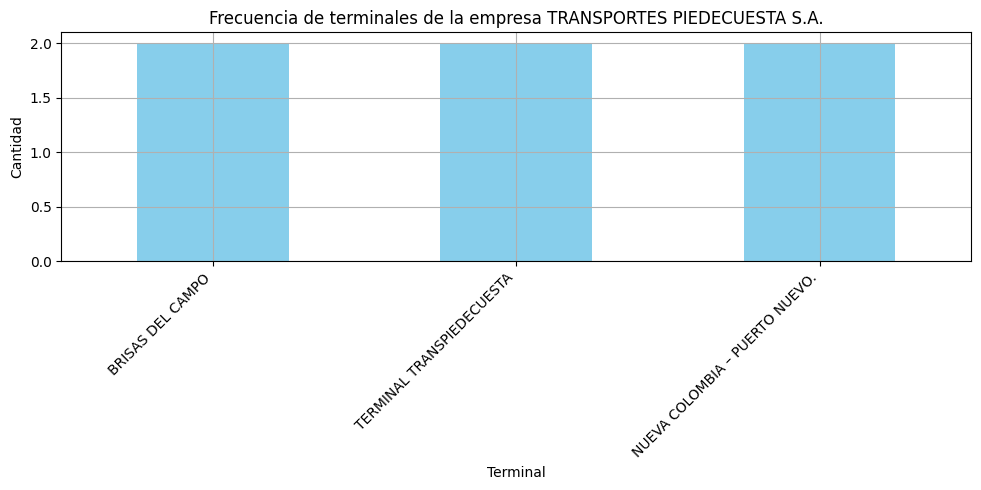

In [125]:
df_empr8 = df_filtrado[df_filtrado["empresa"] == "TRANSPORTES PIEDECUESTA S.A."]

nombre_emp = df_empr8["empresa"].iloc[0]
print("Empresa:", nombre_emp)

cant = len(df_empr8)
cap_max = df_empr8["capacidad_maxima"].mean()
cap_min = df_empr8["capacidad_minima"].mean()
frec_pico = df_empr8["frecuencia_de_despacho_hora_pico"].mean()
frec_valle = df_empr8["frecuencia_despacho_hora_valle"].mean()

print(f"La cantidad de veiculos registrado de la empresa {nombre_emp} es: {cant}")
print(f"El promedio de la \"Capacidad Maxima\" de la empresa {nombre_emp} es: {round(cap_max, 2)}")
print(f"El promedio de la \"Capacidad Minima\" de la empresa {nombre_emp} es: {round(cap_min, 2)}")
print(f"El promedio de la \"Frecuencia de despacho en hora pico\" de la empresa {nombre_emp} es: {round(frec_pico, 2)}")
print(f"El promedio de la \"Frecuencia de despacho en hora valle\" de la empresa {nombre_emp} es: {round(frec_valle, 2)}")

conteo_term = df_empr8["terminal"].value_counts()

conteo_term.plot(kind="bar", figsize=(10,5), color="skyblue")

plt.title(f"Frecuencia de terminales de la empresa {nombre_emp}")
plt.xlabel("Terminal")
plt.ylabel("Cantidad")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid()
plt.show()

## Filtro avanzado: Empresas con vehiculos registrados mayor al promedio & Longitud menor a 30 km

In [128]:
filava = df_filtrado["empresa"].str.replace("OPERACIÓN AUTORIZADA A ", "", regex=False).str.strip()

# Contar frecuencia de empresas
empresas = filava.value_counts()
promedio_vehiculos = empresas.mean()
print("Promedio de vehículos registrados por empresa:", round(promedio_vehiculos))

# Filtrar empresas que están por encima del promedio
empresas_mayores = empresas[empresas > promedio_vehiculos]
print("\nEmpresas por encima del promedio:\n", empresas_mayores)

# Crear un nuevo DataFrame filtrado y asegurar que sea una copia independiente
df_mayores = df_filtrado[
    df_filtrado["empresa"]
    .str.replace("OPERACIÓN AUTORIZADA A ", "", regex=False)
    .str.strip()
    .isin(empresas_mayores.index)
].copy()  # <-- ESTA ES LA CLAVE

print("\nDataFrame filtrado (empresas mayores al promedio):")
print(df_mayores)

# Convertir columna a numérica sin advertencias
df_mayores["long_km"] = pd.to_numeric(df_mayores["long_km"], errors="coerce")

# Filtrar registros con menos de 30 km
df_long = df_mayores[df_mayores["long_km"] < 30].copy()

print("\nDataFrame final (longitud menor a 30 km):")
print(df_long)

Promedio de vehículos registrados por empresa: 5

Empresas por encima del promedio:
 empresa
UNITRANSA S.A.                  12
TRANSCOLOMBIA S.A.               7
TRANSPORTES PIEDECUESTA S.A.     6
COTRANDER                        5
Name: count, dtype: int64

DataFrame filtrado (empresas mayores al promedio):
                                                     ruta  \
codigo                                                      
2       PILOTO # 6 BUENAVISTA - MORRORICO - CARRERA 9 ...   
3       PILOTO # 07 BUENAVISTA - MORRORICO - CARRERA 9...   
4                  DON BOSCO - CARRERA 33 - REAL DE MINAS   
5       CARRIZAL - CALLE 45 - CABECERA - PORTÓN DEL TE...   
6       ILOTO # 08 JOYA – UIS – CARRERA 33 – LA VICTORIA.   
7                                   PILOTO # 02 LIMONCITO   
16                          HAMACAS - CARRERA 33 - REPOSO   
9       TRINIDAD - TERRAZAS - AV. QUEBRADASECA - SAN M...   
10               QUINTA ESTRELLA - REAL DE MINAS - REPOSO   
11               P

## Filtrar grupos cuya cantidad de casos supera el promedio en las rutas 

In [ ]:
#Filtrar grupos cuya cantidad de casos supera el promedio en las rutas
import pandas as pd

df = pd.read_csv("8._RUTAS_TRANSPORTE_URBANO_20251011.csv", index_col="codigo")
print(df.columns)#saco la database de nuevo

DF = df        #para evitar modificar accidentalmente el df
columna_grupo = 'ruta'   #la columna que se usa para el filtrado

#número de casos por grupo
conteos = DF.groupby(columna_grupo).size().rename('casos')
#agrupa el DataFrame por los valores de la columna 'ruta'.
print("Casos por grupo (top 10):")
print(conteos.sort_values(ascending=False).head(10))# Esto ordena conteos en orden descendente
#selecciona las primeras 10 filas

#calculo del promedio de casos
promedio_casos = conteos.mean() #calcula el número promedio de casos
print(f"\nPromedio de casos por grupo: {promedio_casos:.2f}")
#formatea un número como un número de punto fijo con exactamente dos decimales.

#identificacion de grupos con más casos que el promedio
grupos_mayores = conteos[conteos > promedio_casos].index #Esto extrae el índice (los nombres de las rutas únicas)
 # tienen un número de casos mayor que el promedio 
print(f"\nGrupos con más casos que el promedio ({len(grupos_mayores)} encontrados):")#número de rutas que cumplen los criterios de filtrado
#numero de rutas que cumplen los criterios
print(list(grupos_mayores))

#filtrar el DataFrame         ruta
filas_pasaron_filtro = DF[columna_grupo].isin(grupos_mayores) 
#compara los valores de ruta con la lista de grupos que tienen más casos que el promedio
df_filtradorutas = DF.loc[filas_pasaron_filtro].copy()#una copia pero solo de los valores True          
#selecciona solo las filas donde filas_pasaron_filtro es True
#las filas que pertenecen a los grupos con más casos que el promedio


print("\nTamaño del DataFrame filtrado:", df_filtradorutas.shape) #.shape da una tupla con los tamaños del df filtrado
df_filtradorutas.head(df_filtradorutas.shape[0]) #imprime la cantidad de lineas que el shape nos dio en la posicion 0
#esto imprime todas, pero el formato que utilizamos (Jupyter) no deja imprimirlas todas

Index(['ruta', 'terminal', 'empresa', 'cartel_de_ruta_ida', 'recorrido',
       'capacidad_minima', 'capacidad_maxima',
       'frecuencia_de_despacho_hora_pico', 'hora_primer_despacho',
       'hora_ultimo_despacho', 'long_km', 'servicio', 'clase',
       'cartel_de_ruta_regreso', 'frecuencia_despacho_hora_valle'],
      dtype='object')
Casos por grupo (top 10):
ruta
BAHONDO - POBLADO - CALLE 45 - CARRERA 33                          2
BAHONDO - RINCÓN - REAL DE MINAS - UIS                             2
BRISAS DEL CAMPO - RINCÓN - REAL DE MINAS - UIS                    2
CAMPIÑA - POBLADO - CARRERA 33                                     2
BRISAS DEL CAMPO - POBLADO - REAL DE MINAS - UIS                   2
CAFÉ - PALENQUE - PUERTA DEL SOL - UIS                             2
BRISAS DEL CAMPO - RINCÓN - UIS                                    2
CARRIZAL - CARRERA 33                                              2
CARACOLÍ - TRANSVERSAL ORIENTAL – HIPINTO - CARRERA 21 - CENTRO    2
PILOTO #

,ruta,terminal,empresa,cartel_de_ruta_ida,recorrido,capacidad_minima,capacidad_maxima,frecuencia_de_despacho_hora_pico,hora_primer_despacho,hora_ultimo_despacho,long_km,servicio,clase,cartel_de_ruta_regreso,frecuencia_despacho_hora_valle
codigo,,,,,,,,,,,,,,,
34,BAHONDO - POBLADO - CALLE 45 - CARRERA 33,MIRADOR DE ARENALES,OPERACIÓN AUTORIZADA A UNITRANSA S.A.,POBLADO - CALLE 45 - CARRERA 33 - ESTADIO,MIRADOR DE ARENALES - CARRERA 20 - CALLE 10B -...,21,26,7.0,05:00:00 a.m.,08:00:00 p.m.,42.84,BASICO,BUS / BUSETA / MICROBUS,BAHONDO - POBLADO - CALLE 45 - CAMPO HERMOSO -...,12.0
35,BAHONDO - RINCÓN - REAL DE MINAS - UIS,BAHONDO,TRANSPORTES PIEDECUESTA S.A,RINCÓN - REAL DE MINAS - CARRERA 17 - CENTRO -...,BAHONDO - CARRERA 20 - CALLE 10 B - CARRERA 26...,5,6,15.0,05:00:00 a.m.,06:30:00 p.m.,34.7,BASICO,BUS / BUSETA / MICROBUS,NaN,18.0
36,PILOTO # 01 IGSABELAR,GONZALEZ CHAPARRO,COTRANDER,IGSABELAR – AUTOPISTA –CARRERA 33 – GUARÍN –BA...,NaN,10,13,8.0,05:00:00 a.m.,07:30:00 p.m.,22,BASICO,BUS / BUSETA / MICROBUS,.IGSABELAR – PIENTE LA FLORA – CACIQUE – PLAZA...,12.0
37,BRISAS DEL CAMPO - RINCÓN - UIS,BRISAS DEL CAMPO,METROPOLITANA DE SERVICIOS S.A.,BRISAS DEL CAMPO - RINCÓN - UIS,BRISAS DEL CAMPO - - LAS PALOMAS - CARRERA 26 ...,11,13,9.0,NaN,NaN,36.3,BASICO,BUS / BUSETA / MICROBUS,NaN,9.0
38,CAFÉ - PALENQUE - PUERTA DEL SOL - UIS,COLORADOS,METROPOLITANA DE SERVICIOS S.A.,COLORADOS - PALENQUE - PUERTA DEL SOL - UIS,COLORADOS – CEMENTO – BAVARIA - CAFÉ MADRID - ...,12,14,10.0,NaN,NaN,58.4,BASICO,BUS / BUSETA / MICROBUS,NaN,10.0
39,BRISAS DEL CAMPO - RINCÓN - REAL DE MINAS - UIS,BRISAS DEL CAMPO,ORIENTAL DE TRANSPORTES S.A.,BRISAS DEL CAMPO - RINCÓN - REAL DE MINAS - UIS,BRISAS DEL CAMPO - PISCINAS - CONSUELO - CALLE...,18,23,8.0,NaN,NaN,32.2,BASICO,BUS / BUSETA / MICROBUS,NaN,8.0
40,CAMPIÑA - POBLADO - CARRERA 33,LA CAMPIÑA,COOTRAGAS CTA.,CAMPIÑA - POBLADO - CARRERA 33,CARRERA 34 CON CALLE 36 BARRIO ALDEA ALTA - CA...,13,14,10.0,NaN,NaN,24.3,BASICO,BUS / BUSETA / MICROBUS,NaN,10.0
41,CARACOLÍ - TRANSVERSAL ORIENTAL – HIPINTO - CA...,CARACOLÍ,LUSITANIA S.A.,NaN,CARACOLÍ - TRANSVERSAL ORIENTAL - VIADUCTO LA ...,10,11,9.0,NaN,NaN,21.8,BASICO,BUS / BUSETA / MICROBUS,NaN,9.0
42,LA MESETA - RINCÓN DE GIRÓN - REAL DE MINAS - ...,LA MESETA,ORIENTAL DE TRANSPORTES S.A.,LA MESETA - RINCÓN DE GIRÓN - REAL DE MINAS - ...,HACIENDA LA MESETA - MIRADOR DE ARENALES - CAR...,10,12,NaN,NaN,NaN,37.45,BASICO,BUS / BUSETA / MICROBUS,NaN,NaN


## desviación estandar

In [1]:
import pandas as pd
df = pd.read_csv("8._RUTAS_TRANSPORTE_URBANO_20251011.csv", index_col="codigo")
df['long_km'] = (df['long_km'].astype(str) #lo convierte a string para que sea mas facil de trabajar
                 
                 .str.replace(',', '.', regex=False)          #comas -> puntos

                 .str.extract(r"([-+]?[0-9]*\.?[0-9]+)")[0]   #Busca dentro del texto solo numeros
                 #esa cosota significa:
                 #[-+]? → puede tener signo “+” o “-” al inicio.
                 #[0-9]* → puede tener varios dígitos antes del punto.
                 #\.? → puede tener un punto decimal.
                 #[0-9]+ → al menos un dígito después del punto.
                    # el [0] al final toma la columna del resultado del extract,
                    # ya que devuelve un DataFrame.
                 
                 #lo anterior bota texto; esto lo vuelve a float
                 .astype(float, errors='ignore'))
                  #errors evita que se mate el programa si hay algún valor no convertible
                  # (lo deja igual)

#agrupacion por empresa

#agrupa el DataFrame por la columna empresa
                             #dropna=False hace que también incluya filas donde “empresa” está vacía
res = df.groupby('empresa', dropna=False)['long_km'].agg(cantidad='count', promedio_km='mean', desviacion_estandar_km='std') \
    .reset_index()                                  #agg es agreggate; agregar
  #Convierte el índice del groupby en un un DataFrame limpio para imprimir

print(res)   # muestra en consola

                                              empresa  cantidad  promedio_km  \
0                                      COOTRAGAS CTA.         2    24.300000   
1                                           COTRANDER         3    23.666667   
2                                      LUSITANIA S.A.         5    22.148000   
3                     METROPOLITANA DE SERVICIOS S.A.         4    47.350000   
4                    OPERACIÓN AUTORIZADA A COTRANDER         4    27.792500   
5           OPERACIÓN AUTORIZADA A TRANSCOLOMBIA S.A.         8    37.548750   
6               OPERACIÓN AUTORIZADA A UNITRANSA S.A.        12    31.481667   
7                        ORIENTAL DE TRANSPORTES S.A.         7    28.057143   
8                              TRANSPORTES GIRÓN S.A.         3    34.000000   
9                         TRANSPORTES PIEDECUESTA S.A         4    54.350000   
10                       TRANSPORTES PIEDECUESTA S.A.        10    43.100000   
11  TRANSPORTES PIEDECUESTA S.A. TRANSPO

## filtrado por hora

In [5]:
#Filtrar eventos sucedidos en un año mayor a 20xx (Sugeto a cambio de filtro [año cambiar a por hora de despache](definido por el grupo).

#Filtrado por hora 
import pandas as pd

df = pd.read_csv("8._RUTAS_TRANSPORTE_URBANO_20251011.csv", index_col="codigo")
print(df.columns) # saco la database de nuevo

DF = df        # para evitar modificar accidentalmente el df
time_col = 'hora_primer_despacho'   #columna con la hora 
hour_threshold = 17          #filtrar despachos posteriores a esta hora; un filtro arbitrario

# extraer la hora      

# --- arreglo rápido: normalizar formatos tipo "a.m. / p.m." y extraer la hora ---
s = DF[time_col].astype(str)
# normaliza variantes como "a.m.", "a. m.", "am", "AM" -> "AM" (igual para PM)
s = s.str.replace(r'(?i)a\.?\s*m\.?', 'AM', regex=True)
s = s.str.replace(r'(?i)p\.?\s*m\.?', 'PM', regex=True)
# quitar comas y espacios repetidos
s = s.str.replace(r',', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()

# convertir a datetime y extraer la hora (NaT -> NaN)
DF[time_col + '_hora'] = pd.to_datetime(s, errors='coerce').dt.hour

# debug rápido: cuántos no se pudieron parsear y ejemplos (borra si no quieres verlos)
no_parse = DF[time_col + '_hora'].isna().sum()
print(f"Valores no parseados en {time_col}: {no_parse}")
if no_parse:
    print("Ejemplos no parseados:", DF.loc[DF[time_col + '_hora'].isna(), time_col].unique()[:10])


#filtrado por hora 
#               True para filas con hora > umbral)
filas_hora = DF[time_col + '_hora'] > hour_threshold

df_filtradohoras = DF.loc[filas_hora].copy() #una copia pero solo de los valores True
#selecciona solo las filas donde filas_pasaron_filtro es True

#informar cuántas filas quedaron
print(f"\nFiltrado aplicado: {time_col} > {hour_threshold} -> filas seleccionadas: {df_filtradohoras.shape[0]}")

# mostrar resultado (tamaño y primeras filas)
print("\nTamaño del DataFrame filtrado:", df_filtradohoras.shape)#.shape da una tupla con los tamaños del df filtrado
df_filtradohoras.head(df_filtradohoras.shape[0])#imprime la cantidad de lineas que el shape nos dio en la posicion 0
#esto imprime todas, pero el formato que utilizamos (Jupyter) no deja imprimirlas todas


Index(['ruta', 'terminal', 'empresa', 'cartel_de_ruta_ida', 'recorrido',
       'capacidad_minima', 'capacidad_maxima',
       'frecuencia_de_despacho_hora_pico', 'hora_primer_despacho',
       'hora_ultimo_despacho', 'long_km', 'servicio', 'clase',
       'cartel_de_ruta_regreso', 'frecuencia_despacho_hora_valle'],
      dtype='object')
Valores no parseados en hora_primer_despacho: 39
Ejemplos no parseados: [nan '5:00 a.m. - domingo festivos 5:30 a.m.'
 '5:00 a.m. - domingo y festivos 6:00 a.m.'
 '4:50 a.m. - domingos y festivos 5:00 a.m.'
 '4:40 a.m. - domingos y festivos 6: 00 a.m.'
 '5:00 a.m. - domingos y festivos 6:00 a.m.'
 '4:50 a.m. - domingos y festivos 6:00 a.m.'
 '4:40 a.m. - domingos y festivos 5:40 a.m..']

Filtrado aplicado: hora_primer_despacho > 17 -> filas seleccionadas: 0

Tamaño del DataFrame filtrado: (0, 16)


/tmp/ipykernel_2583/493219689.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  DF[time_col + '_hora'] = pd.to_datetime(s, errors='coerce').dt.hour


,ruta,terminal,empresa,cartel_de_ruta_ida,recorrido,capacidad_minima,capacidad_maxima,frecuencia_de_despacho_hora_pico,hora_primer_despacho,hora_ultimo_despacho,long_km,servicio,clase,cartel_de_ruta_regreso,frecuencia_despacho_hora_valle,hora_primer_despacho_hora
codigo,,,,,,,,,,,,,,,,
